Testing...
Start classifing without kernel


C:\Users\Catherine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Catherine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.993322203672788
Start classifing with kernel


C:\Users\Catherine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Catherine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0
Input features:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  5. ... 15.  3.  0.]
 [ 0.  2. 12. ...  0.  0.  0.]
 ...
 [ 0.  0.  5. ... 13. 12.  4.]
 [ 0.  0.  0. ...  4.  0.  0.]
 [ 0.  0.  0. ... 16. 13.  0.]]
Post-kernel features:
[[ 1.00000000e+00 -1.86590354e-05 -1.76856246e-05 ...  3.30809171e-06
   1.40481482e-06  2.65853767e-05]
 [-1.86590354e-05  1.00000000e+00 -7.96251059e-07 ...  8.78239479e-08
   6.10557199e-07 -6.97881476e-07]
 [-1.76856246e-05 -7.96251059e-07  1.00000000e+00 ... -5.00561959e-07
   8.45803522e-08  6.62032575e-07]
 ...
 [ 3.30809171e-06  8.78239484e-08 -5.00561959e-07 ...  1.00000000e+00
   1.13162016e-07  5.86224375e-07]
 [ 1.40481482e-06  6.10557200e-07  8.45803533e-08 ...  1.13162015e-07
   1.00000000e+00 -2.77448785e-08]
 [ 2.65853767e-05 -6.97881475e-07  6.62032575e-07 ...  5.86224375e-07
  -2.77448791e-08  1.00000000e+00]]
Prediction output with original features:
[1 9 5 ... 2 4 6]
Predicion output with post-kernel features:
[1 9 5 ... 2 4 6]
Correct 

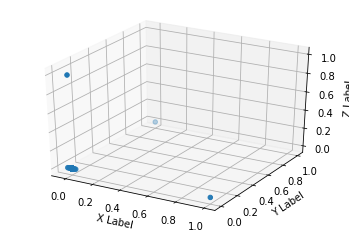

In [49]:
import random , math
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

def radialBasisFunctionKernel(x,y):
    sigma=4
    X=np.array(x)
    Y=np.array(y)
    result = np.exp(- np.linalg.norm(X-Y)/(2*sigma**2))
    return result

def loadDataset(fileX, fileY):
    x = np.genfromtxt(fileX, delimiter=',')
    y = np.genfromtxt(fileY, delimiter=',',dtype=np.int)-1
    #y=np.array([k if k == 1 else -1 for k in y])
    return x,y


def randomize(inputs, targets):
    N = inputs.shape[0] # Number  of  rows  ( s a m p l e s )
    permute=list(range(N))
    random.shuffle(permute)
    inputs_out = inputs [permute, : ]
    targets_out = targets [permute ]
    return inputs_out, targets_out

def TestResults(inputs,targets,results,iterations):
    print("Testing...")
    print("Start classifing without kernel")
    original = LogisticRegression( max_iter=iterations).fit(inputs, targets)

    print(original.score(inputs,targets))

    print("Start classifing with kernel")
    new = LogisticRegression( max_iter=iterations).fit(results, targets)
    print(new.score(results,targets))
    print("Input features:")
    print(inputs)
    print("Post-kernel features:")
    print(results)
    print("Prediction output with original features:")
    print(original.predict(inputs))
    print("Predicion output with post-kernel features:")
    print(new.predict(results))
    print("Correct output:")
    print(targets)

def generateDiagonalMatrix(inputs):
    N=inputs.shape[0]
    Affinity_Matrix = []
    for i in range(N):
        Affinity_Matrix.append(np.zeros(N))

    for i in range(N):
        for j in range(N):
            Affinity_Matrix[i][j]=radialBasisFunctionKernel(inputs[i],inputs[j])
            if(i==j):
                Affinity_Matrix[i][j]=1
    K=np.matrix(Affinity_Matrix)
    return K

def generateDMatrix(K):
    N=len(K)
    D= []
    for i in range(N):
        D.append(np.zeros(N))
        D[i][i]=np.sum(K[i])
    D=np.matrix(D)
    return D

def generateLMatrix(K,D):
    D=fractional_matrix_power(D,-(0.5))
    L=D*K*D
    L=np.matrix(L)
    return L


def transfer_function(L,k,function):
    t = 3
    w,V=np.linalg.eig(L)
    w = np.diag(w)
    if function == "linear":
        return w
    if function == "step":
        w,V=np.linalg.eig(L)
        w_cut = np.sort(w)[k-1]
        w = np.diag(w)
        for i in range(w.shape[0]):
            for j in range(w.shape[1]):
                if w[i,j] >= w_cut:
                    w[i,j] = 1
                else:
                    w[i,j] = 0
                    
    if function == "linear step":
        w,V=np.linalg.eig(L)
        w_cut = np.sort(w)[k-1]
        w = np.diag(w)
        for i in range(w.shape[0]):
            for j in range(w.shape[1]):
                if w[i,j] >= w_cut:
                    w[i,j] = w[i,j]
                else:
                    w[i,j] = 0
    
    if function == "polynomial":
        w,V=np.linalg.eig(L)
        w_cut = np.sort(w)[k-1]
        w = np.diag(w)
        for i in range(w.shape[0]):
            for j in range(w.shape[1]):
                w[i,j] = w[i,j]**t
    return w

def lNew(L,k,function): #step 3
    w,V = np.linalg.eig(L)
    L_new = V.dot(transfer_function(L,k,function)).dot(np.linalg.inv(V))
    return L_new

def kNew(L_new): #step 4
    D_new = np.zeros((L.shape))
    for i in range(D_new.shape[0]):
        D_new[i,i] = 1/L_new[i,i]
    K_new = fractional_matrix_power(D_new,0.5).dot(L_new).dot(fractional_matrix_power(D_new,0.5))    
    return K_new


#inputs,targets=loadDataset('irisX.txt','irisY')		#load data from file
#inputs,targets=generateDataset()
inputs,targets=load_digits(n_class=10, return_X_y=True)
inputs,targets=randomize(inputs,targets)
N=inputs.shape[0]
#print(N) 
k = 10 #Desired NUMBER OF CLUSTERS (small k)
K=generateDiagonalMatrix(inputs)  #(uppercase K) STEP 1 


D=generateDMatrix(K) #STEP 2
L=generateLMatrix(K,D)
L_new = lNew(L,k,"step") #step 3
K_new = kNew(L_new) #step 4
#print(K_new)

TestResults(inputs,targets,K_new,1000) #Test the results

#Output the new points representation (does only works with 3D points)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(K_new.transpose()[0], K_new.transpose()[1],K_new.transpose()[2])
#ax.scatter(V.transpose()[0], V.transpose()[1])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
#plt.figure()
#plt.plot(inputs.transpose()[0],inputs.transpose()[1],'rs')
#plt.show()
#plt.plot(np.array(V.transpose()[0])[0],np.array(V.transpose()[1])[0],'bs')



